In [1]:
from robotodo.engines.isaac._kernel import configure_default_kernel, get_default_kernel

# TODO optional
configure_default_kernel(extra_argv=["--no-window"])

get_default_kernel()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------

2025-10-28T07:41:26Z [8,533ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed
2025-10-28T07:41:28Z [10,314ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-28T07:41:28Z [10,314ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-28T07:41:28Z [10,584ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


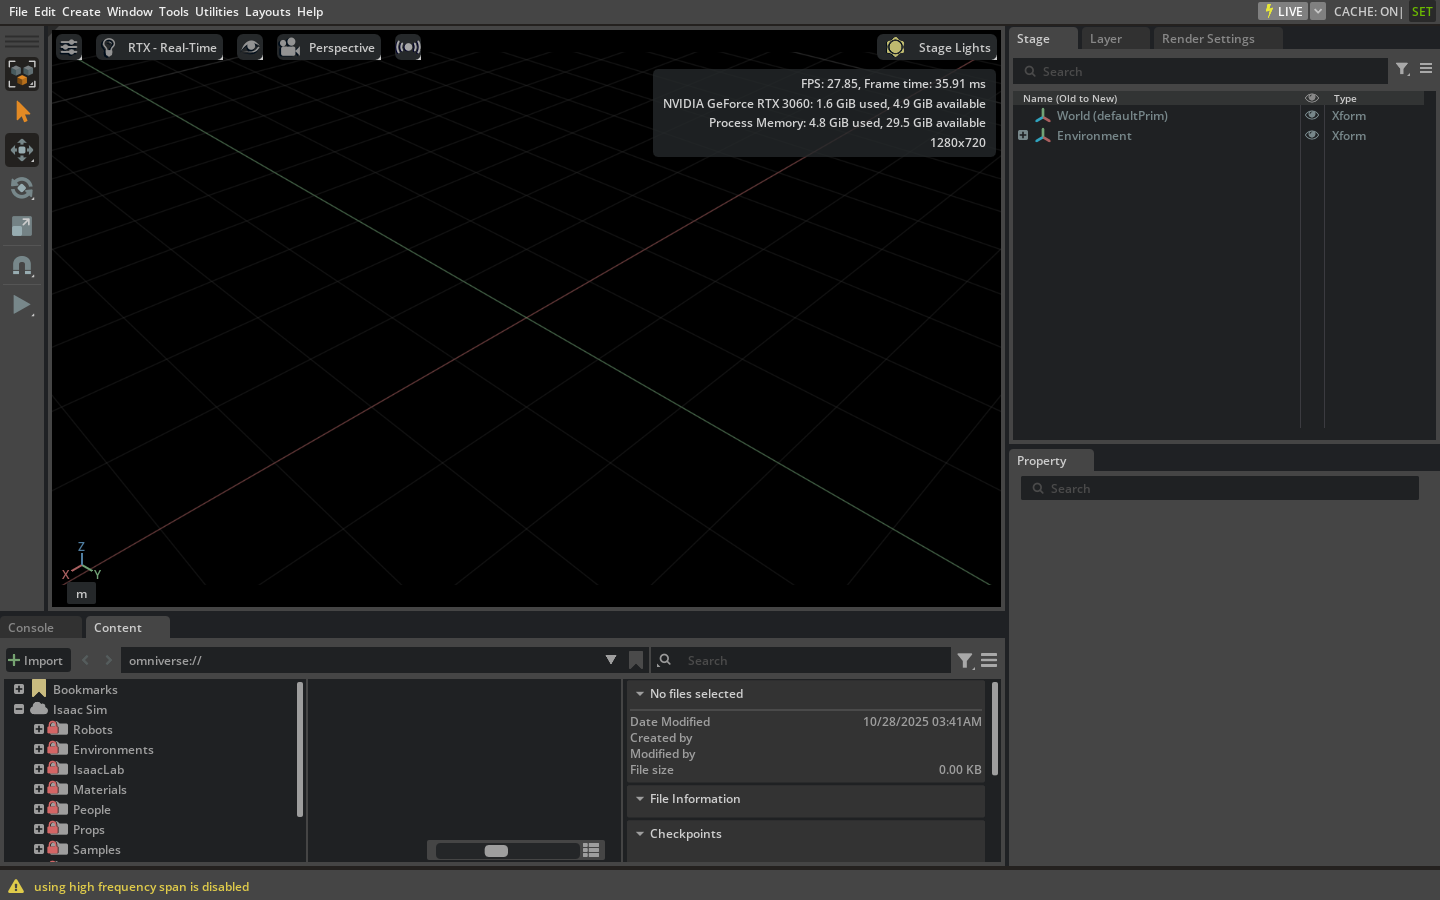

In [ ]:
import ctypes

import omni
import numpy


def _todo_read_framebuffer(callback: ...):
    def _next_frame_swapchain_callback(buffer, buffer_size, width, height, buffer_format):
        ctypes.pythonapi.PyCapsule_GetPointer.restype = ctypes.POINTER(ctypes.c_byte * buffer_size)
        ctypes.pythonapi.PyCapsule_GetPointer.argtypes = [ctypes.py_object, ctypes.c_char_p]
        pointer = ctypes.pythonapi.PyCapsule_GetPointer(buffer, None)

        match buffer_format:
            case buffer_format.BGRA8_UNORM:
                arr = (
                    numpy.frombuffer(pointer.contents, dtype=numpy.uint8)
                    .reshape((height, width, 4), order="C")
                )
            case _:
                # TODO 
                raise NotImplementedError("TODO")

        callback(arr)

    window_factory = omni.appwindow.acquire_app_window_factory_interface()
    app_window = window_factory.get_default_window()

    renderer_capture = omni.kit.renderer_capture.acquire_renderer_capture_interface()
    # TODO
    return renderer_capture.capture_next_frame_swapchain_callback(
        _next_frame_swapchain_callback, 
        # TODO
        app_window=app_window,
    )

@_todo_read_framebuffer
def _(arr):
    from PIL import Image
    display(Image.fromarray(arr, 'RGBA'))